#**<center>Does less hours of sleep affect the school performance?** 


## **Introduction**
Sleep can be one of the most important factors for a student's success and is often one of the most neglected. Many students will sacrifice sleep in order to work, play, or complete school projects. Also, most people think they can function well when they don't get sleep. In this research, we will see if there is a relationship between lack of sleep and student performance in school. 

<h2><b>Contents<b/></h2>
<ul>
  <li>Abstract</li>
  <li>Which age group is the most affected?</li>
  <li>Is there a relation between the level of study and lack of sleep?</li>
  <li>Do students who have a job perform worse at school than students who do not?</li>
   <li>Hypothesis</li>
  <li>Conclusion</li>
</ul>

##**Abstract** 
The amount of sleep affects the way students perform, feel, think, learn, and remember. Lack of sleep increases the potential for increased daytime sleepiness, which can lead to decreased attention and confusion. Other consequences of sleep deprivation include poor school performance such as lack of interest during lessons and poor exam results. The purpose of this research is to explore the effects of sleep on school performance.This study is a sample study. A total of 25 FHICT students completed an online survey via Google Forms. The data obtained from the survey will be analyzed using a Jupyter notebook, as graphs can be plotted using different libraries to provide better visualization.


Below is the survey used for collecting data.

[Survey](https://docs.google.com/forms/d/e/1FAIpQLSdhQ2t3qZobpprkfu_U0PmKiNrdo3dwN_UhhTuTIvNo38PhJA/viewform)


In [ ]:
# imported needed libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

import statsmodels.api as sm

# next command ensures that plots appear inside the notebook
%matplotlib inline
sns.set()  # set Seaborn default

# read csv file
answers = pd.read_csv('answers.csv')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Which age group is the most affected ?**




In order to see which age is the most affected by the lack of sleep, we will generate a graph and discuss the result.

Text(0, 0.5, 'Average time of sleep')

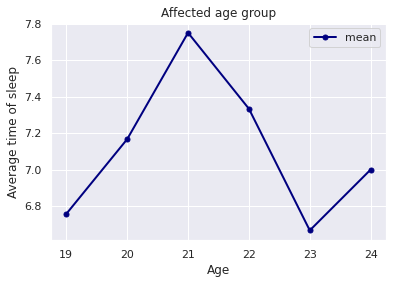

In [ ]:
groupedByAge = answers.groupby(['Age'])
meanByAge = groupedByAge['Hours_sleep'].agg([np.mean])
df = pd.DataFrame(meanByAge)
ax = df.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Affected age group')
ax.set_xlabel("Age")
ax.set_ylabel("Average time of sleep")

According to the above-generated graph from the sample, students who are 23 years old seem to sleep the lowest on average, while students who are 21 sleep the highest. Reasons for this result can range from school overload to different sleeping disorders.



## **Is there a relation between the level of study and lack of sleep?**

Text(0, 0.5, 'Time of sleep')

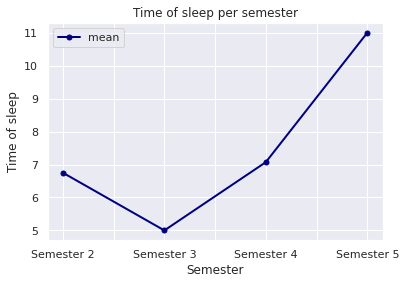

In [ ]:
groupedBySemester = answers.groupby('Semester')
meanBySemester = groupedBySemester['Hours_sleep'].agg([np.mean])

df1 = pd.DataFrame(meanBySemester)
ax = df1.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Time of sleep per semester')
ax.set_xlabel("Semester")
ax.set_ylabel("Time of sleep")


Initially, we assumed that, as students progress in further semesters, they would sleep less on average. However, according to the collected sample, it seems that students who are semester 2 and semester 3 sleep below the average time, while students in semesters 4 and 5 sleep more.
Therefore, the establishment of a relationship between the level of study and the average lack of sleep can be partially assumed, because we cannot conclude if this is the result for the whole population of FHICT students.

## **Do students who have a job perform worse at school than students who do not?**

Text(0, 0.5, 'Time of sleep')

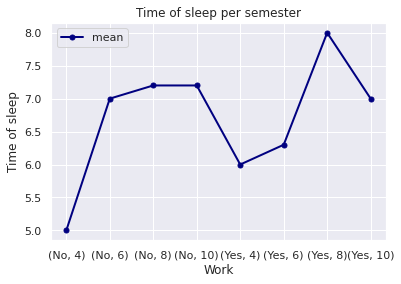

In [ ]:
groupedByWork = answers.groupby(['Work', 'Grade'])
meanByWork = groupedByWork['Hours_sleep'].agg([np.mean])


df = pd.DataFrame(meanByWork)
ax = df.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Time of sleep per semester')
ax.set_xlabel("Work")
ax.set_ylabel("Time of sleep")

According to this graph, it does seem that students who do not work perform worse than the ones who work. Before taking collecting the data, we have assumed that students who work might perform worse than students who don't. Since this is a relatively small sample, cannot fully conclude the assumption for the whole population of students. In future projects, it might be a better idea to have people who do not work or only work to find a more clear result.

## **Hypothesis:**
$$𝐻o:\mu_{1} = \mu_{2}, (Hours \ of \ sleep \ will \ not \ affect \ school \ performance)$$ 

$$𝐻a:\mu_{1} > \mu_{2}, (Hours \ of \ sleep \ will \ affect \ school \ performance)$$ 
where 


$\mu_1 \ = $ mean of students who sleep 7 hours or above. 

$\mu_2 \ = $ mean of students who sleep less than 7 hours. 



###Hypothesis Tests



In order to test our hypothesis, we need to, first filter the data based on the amount of sleep. There are two main groups which we are going to test.

Afterward, we need to find the standard deviation and mean for each group of students, depending on the grade.



In [ ]:
filterByAboveEqual7 = answers[ (answers['Hours_sleep'] >= 7) ]
# finding the sample Standard deviation
s1 = np.std(filterByAboveEqual7['Grade'], ddof=1)
# finding the mean
x1_bar = np.mean(filterByAboveEqual7['Grade'].mean())
print(f"Mean of Grade is {filterByAboveEqual7['Grade'].mean()}")
print(f"Sample Standard deviation of Grade is {np.std(filterByAboveEqual7['Grade'], ddof=1)}")
# Group 1 
group1 = filterByAboveEqual7['Grade']
# length of group 1
n1 = len(group1)

df = pd.DataFrame(filterByAboveEqual7)
df

Mean of Grade is 8.444444444444445
Sample Standard deviation of Grade is 1.2935233335271095


,Date,Age,Semester,Hours_sleep,Grade,Work
0,18.02.2022 15:50:00,19,Semester 4,8.0,10,No
1,18.02.2022 15:51:10,20,Semester 4,7.0,10,No
3,18.02.2022 15:53:16,19,Semester 2,7.0,10,No
4,18.02.2022 15:56:52,19,Semester 2,7.0,8,Yes
5,18.02.2022 16:00:24,22,Semester 4,7.0,10,No
7,18.02.2022 16:04:31,20,Semester 4,7.0,8,No
8,18.02.2022 16:08:04,20,Semester 4,7.0,8,No
9,18.02.2022 16:09:19,23,Semester 4,7.0,10,Yes
10,18.02.2022 16:20:31,23,Semester 4,7.0,6,No
11,18.02.2022 16:23:49,19,Semester 4,7.0,8,No


In [ ]:
filterByBelow7 = answers[ (answers['Hours_sleep'] < 7) ]
# finding the sample Standard deviation
s2 = np.std(filterByBelow7['Grade'], ddof=1)
# finding the mean
x2_bar = np.mean(filterByBelow7['Grade'].mean())
# print("\n",filterByBelow7)
print(f"The mean of Grade is {filterByBelow7['Grade'].mean()}")
print(f"The Sample Standard deviation of Grade is {np.std(filterByBelow7['Grade'], ddof=1)}")
# Group 2 
group2 = filterByBelow7['Grade']
# length of group 2
n2 = len(group1)
df = pd.DataFrame(filterByBelow7)
df

The mean of Grade is 6.333333333333333
The Sample Standard deviation of Grade is 1.96638416050035


,Date,Age,Semester,Hours_sleep,Grade,Work
2,18.02.2022 15:51:44,20,Semester 3,5.0,4,No
6,18.02.2022 16:02:38,21,Semester 4,6.0,8,No
14,18.02.2022 17:18:10,21,Semester 2,6.0,4,Yes
20,18.02.2022 19:19:42,23,Semester 4,6.0,8,No
21,19.02.2022 01:18:37,19,Semester 4,5.0,8,No
22,19.02.2022 05:58:00,19,Semester 4,6.3,6,Yes


After gathering everything we need for testing our hypothesis, we use two ways to test. The first way is using F-Statistic and the second way is using T-Statistic.

### **F-Statistic**

In [ ]:
# the Significance test
alpha = 0.05
import scipy.stats as stats

if s1 > s2:
    F_score = s1**2 / s2**2
    critical_value = stats.f.ppf(1-alpha, n1-1, n2-1)
else:
    F_score = s2**2 / s1**2
    critical_value = stats.f.ppf(1-alpha, n2-1, n1-1)


print("F-score is:", F_score, " and critical value is:", critical_value)
conclusion = "Null hypothesis is accepted."
t_test_type = "pooled_variance t test"
if F_score > critical_value:
    conclusion = "Null Hypothesis is rejected."
    t_test_type = "separate-variances t test"
print(conclusion)

F-score is: 2.3109374999999988  and critical value is: 2.2718928890253784
Null Hypothesis is rejected.


F-Statistic tells us if the standard deviations from two sets of data are statistically different. 
F-Statistic is calculated using this formula: 
\begin{equation*}
F =  \frac{(S_1)^2}{(S_2)^2}
\end{equation*}

1.   In this formula we divide the standard deviation of the one sample by the standard deviation of the other sample. 
2.   We must put the higher standard decviation as the numerator and the lowest standard deviation as denominator. 



### T-Statistic 

In [ ]:
t_value,p_value=stats.ttest_ind(group1, group2, equal_var=True)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))

print('p-value is %f'%p_value)


if p_value >= alpha:
    print("Null hypothesis is accepted.")
else:
     print("Null Hypothesis is rejected.")

Test statistic is 3.038895
p-value is 0.006025
Null Hypothesis is rejected.


T-Statistic is used to test if there is a significant difference between the means of two groups. 
T-Statistic is calculated using this formula: 
\begin{equation*}
t =  \frac{\mu_1 - \mu_2}{\sqrt{\frac 1 n_1 + \frac 1 n_2}}
\end{equation*}




###The difference between T-Statistics and F-Statistics 

Both tests give the same result, the only difference being that F-statistics checks whether the variability between two or more samples, is actually identical. Therefore, we need to use the standard deviation for calculating it.

On the other hand, the T-Statistics can work with one or more samples and we need to find the mean and to know the sample size.

##**Conclusion**
Finally, after testing our null and alternative hypothesis, we found that there is a correlation between the amount of sleep and school performance. We have used two ways in order to test our hypothesis, by using F-Statistic and T-Statistic. Both tests have the same result, namely the "Reject null hypothesis", therefore, we can conclude that our calculations are correct and, indeed, the lack of sleep has an impact on school performance. 
